In [3]:
# k平均法による画像の減色処理
#
# 2015/04/24 ver1.0
#

import numpy as np
from numpy.random import randint
from PIL import Image

# add for jupyter notebook
from IPython.display import Image as DisplayImage

In [4]:
#------------#
# Parameters #
#------------#
Colors = [2, 3, 5, 16]  # 減色後の色数（任意の個数の色数を指定できます）


In [29]:
# k平均法による減色処理
def run_kmeans(pixels, k):
    cls = [0] * len(pixels)

    # 代表色の初期値をランダムに設定
    center = []
    for i in range(k):
        center.append(np.array([randint(256), randint(256), randint(256)]))
    print("Initial centers:")
    print(list(map(lambda x: x.tolist(), center)))
    print("========================")
    distortion = 0.0

    # 最大50回のIterationを実施
    for iter_num in range(50): 
        center_new = []
        for i in range(k):
            center_new.append(np.array([0,0,0]))
        num_points = [0] * k
        distortion_new = 0.0

        # E Phase: 各データが属するグループ（代表色）を計算
        for pix, point in enumerate(pixels):
            min_dist = 256*256*3
            point = np.array(point)
            for i in range(k):
                d = sum([x*x for x in point-center[i]])
                if d < min_dist:
                    min_dist = d
                    cls[pix] = i
            center_new[cls[pix]] += point
            num_points[cls[pix]] += 1
            distortion_new += min_dist

        # M Phase: 新しい代表色を計算
        for i in range(k):
#            center_new[i] = center_new[i] / num_points[i]
            center_new[i] = center_new[i] // num_points[i]
        center = center_new
        print(list(map(lambda x: x.tolist(), center)))
        print("Distortion: J=%d" % distortion_new)

        # Distortion(J)の変化が0.1%未満になったら終了
        if iter_num > 0 and distortion - distortion_new < distortion * 0.001:
            break
        distortion = distortion_new

    # 画像データの各ピクセルを代表色で置き換え
    for pix, point in enumerate(pixels):
        pixels[pix] = tuple(center[cls[pix]])

    return pixels
     

In [27]:
import subprocess
cur_dir = subprocess.check_output(["pwd"]).decode().strip()
cur_dir

'/Users/knt/programming/python/ml4se/notebook'

In [32]:
#for k in Colors:
for k in Colors[:1]:
    print("")
    print("========================")
    print("Number of clusters: K=%d" % k)
    # 画像ファイルの読み込み
    # im = Image.open("photo.jpg")
    im = Image.open(cur_dir + "/../scripts/photo.jpg")
    pixels = list(im.convert('RGB').getdata())
    # k平均法による減色処理
    result = run_kmeans(pixels, k)
    # 画像データの更新とファイル出力
    im.putdata(result) # Update image
    # im.save("output%02d.bmp" % k, "BMP")
    DisplayImage(im)


Number of clusters: K=2
Initial centers:
[[237, 104, 243], [179, 121, 37]]
[[235, 217, 223], [111, 97, 63]]
Distortion: J=2474439438
[[234, 219, 223], [112, 96, 63]]
Distortion: J=899884724
[[234, 219, 223], [112, 96, 64]]
Distortion: J=899234811


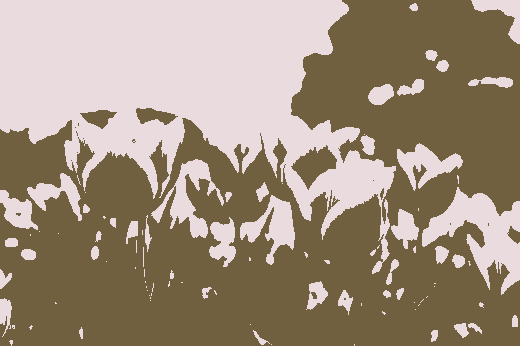

In [46]:
im

In [34]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [35]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=520x346 at 0x10B4B47F0>


In [37]:
type(result)

list

In [38]:
type(result[0])

tuple

In [39]:
print(result[0])

(234, 219, 223)


In [42]:
DisplayImage(result)

/Users/knt/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/IPython/core/formatters.py:367: FormatterWarning: image/png formatter returned invalid type <class 'list'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

In [45]:
DisplayImage()

ValueError: No image data found. Expecting filename, url, or data.

In [41]:
help(DisplayImage)

Help on class Image in module IPython.core.display:

class Image(DisplayObject)
 |  An object that wraps data to be displayed.
 |  
 |  Method resolution order:
 |      Image
 |      DisplayObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, url=None, filename=None, format='png', embed=None, width=None, height=None, retina=False, unconfined=False, metadata=None)
 |      Create a PNG/JPEG image object given raw data.
 |      
 |      When this object is returned by an input cell or passed to the
 |      display function, it will result in the image being displayed
 |      in the frontend.
 |      
 |      Parameters
 |      ----------
 |      data : unicode, str or bytes
 |          The raw image data or a URL or filename to load the data from.
 |          This always results in embedded image data.
 |      url : unicode
 |          A URL to download the data from. If you specify `url=`,
 |          the image data will not be embedded unless 